C:\Users\Minseok\AppData\Local\Temp\ipykernel_32372\2131574301.py:65: UserWarning: frames=<generator object shell_sort at 0x000001F154C92840> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


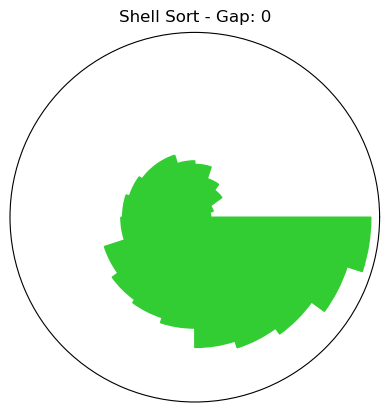

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    """
    n: 생성할 데이터의 개수
    max_val: 데이터의 최대값
    """
    return [random.randint(1, max_val) for _ in range(n)]

# Shell Sort 알고리즘 (애니메이션용 generator)
def shell_sort(data):
    n = len(data)
    gap = n // 2  # 초기 간격 설정
    while gap > 0:
        for i in range(gap, n):
            temp = data[i]
            j = i
            while j >= gap and data[j - gap] > temp:
                data[j] = data[j - gap]
                j -= gap
                yield data, j + gap, j, gap  # 현재 비교 상태와 간격(gap)
            data[j] = temp
            yield data, j, -1, gap  # 삽입 후 상태
        gap //= 2  # 간격 감소
    yield data, -1, -1, 0  # 정렬 완료

# 데이터 생성
data = generate_data()

# 애니메이션 그래프 초기화
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)  # 각 데이터에 대한 각도
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')  # 막대 그래프
ax.set_yticks([])  # 반지름 축 제거
ax.set_xticks([])  # 각도 축 제거
ax.set_title("Shell Sort - Circular Animation", va='bottom')

# 업데이트 함수
def update(frame):
    """
    frame: 현재 프레임 데이터 (정렬 상태, 비교 중인 인덱스, 간격)
    """
    current_data, idx1, idx2, gap = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)  # 막대 높이 업데이트
        if idx == idx1:  # 현재 비교 중인 막대
            bar.set_color("yellow")
        elif idx == idx2:  # 비교 대상 막대
            bar.set_color("red")
        elif gap > 0 and idx < len(current_data) - gap:  # 정렬된 부분 강조
            bar.set_color("blue")
        else:  # 나머지 막대
            bar.set_color("limegreen")
    
    # 간격(gap)을 제목에 표시
    ax.set_title(f"Shell Sort - Gap: {gap}", va='bottom')

# 애니메이션 생성
generator = shell_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)

# HTML로 결과 출력
HTML(ani.to_html5_video())
